<a href="https://colab.research.google.com/github/OshiniBandara/Computer_Vision_Assignment/blob/main/Computer_Vision_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Question 01**

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

img = Image.open('/a1images/emma.jpg').convert("L")
pixel_array = np.array(img)

output_pixels = np.zeros_like(pixel_array, dtype=np.uint8)

In [ ]:
mask_low_range = pixel_array < 50
output_pixels[mask_low_range] = pixel_array[mask_low_range]

mask_mid_range = (pixel_array >= 50) & (pixel_array < 150)
output_pixels[mask_mid_range] = (
    100 + (pixel_array[mask_mid_range] - 50) * (155 // 100)
)

mask_high_range = pixel_array >= 150
output_pixels[mask_high_range] = pixel_array[mask_high_range]

In [ ]:
transformed_image = Image.fromarray(output_pixels)

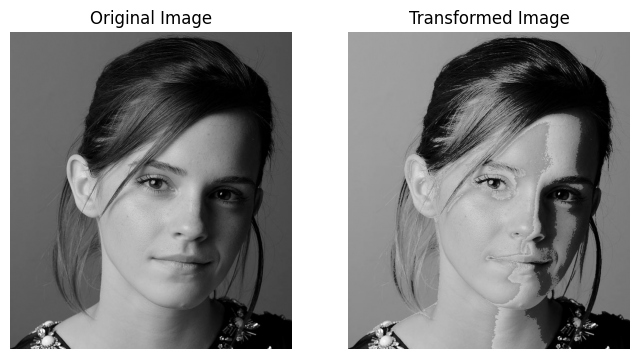

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(pixel_array, cmap="gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(output_pixels, cmap="gray")
plt.title("Transformed Image")
plt.axis("off")

plt.show()

**Question 02**

In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def compute_non_background_percentiles(image_uint8, background_threshold=5):

    all_pixels = image_uint8.ravel()
    foreground_pixels = all_pixels[all_pixels > background_threshold]
    return np.percentile(foreground_pixels, [10, 35, 50, 60, 80, 90])

def create_window_lookup_table(window_min, window_max,
                               output_min=0, output_max=255,
                               outside_slope_ratio=0.05):

    x = np.arange(256, dtype=np.float32)
    inside_slope = (output_max - output_min) / max(window_max - window_min, 1e-6)
    outside_slope = outside_slope_ratio * inside_slope

    lut = np.zeros_like(x)
    below = x < window_min
    inside = (x >= window_min) & (x <= window_max)
    above = x > window_max

    lut[below]  = output_min + outside_slope * (x[below] - window_min)
    lut[inside] = output_min + inside_slope   * (x[inside] - window_min)
    lut[above]  = output_max + outside_slope * (x[above] - window_max)

    return np.clip(lut, 0, 255).astype(np.uint8)

def apply_lut(image_uint8, lut):

    return lut[image_uint8]


image_path = '/a1images/brain_proton_density_slice.png'
brain_image = Image.open(image_path).convert("L")
brain_array = np.array(brain_image)

p10, p35, p50, p60, p80, p90 = compute_non_background_percentiles(brain_array)

white_matter_range = (int(p35), int(p60))
gray_matter_range  = (int(p60), int(p80))

white_matter_lut = create_window_lookup_table(*white_matter_range)
gray_matter_lut  = create_window_lookup_table(*gray_matter_range)

white_matter_contrast = apply_lut(brain_array, white_matter_lut)
gray_matter_contrast  = apply_lut(brain_array, gray_matter_lut)


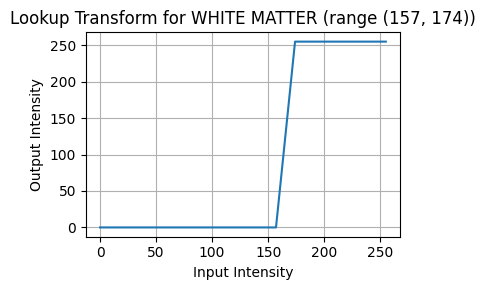

In [3]:
x = np.arange(256)

plt.figure(figsize=(4, 3))
plt.plot(x, white_matter_lut)
plt.title(f"Lookup Transform for WHITE MATTER (range {white_matter_range})")
plt.xlabel("Input Intensity")
plt.ylabel("Output Intensity")
plt.grid(True)
plt.tight_layout()
plt.show()

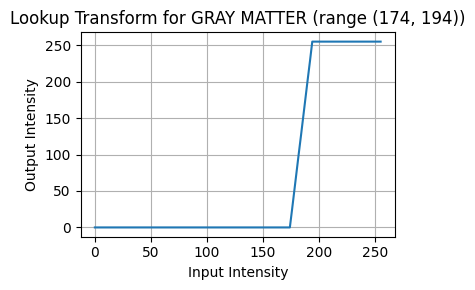

In [4]:
plt.figure(figsize=(4, 3))
plt.plot(x, gray_matter_lut)
plt.title(f"Lookup Transform for GRAY MATTER (range {gray_matter_range})")
plt.xlabel("Input Intensity")
plt.ylabel("Output Intensity")
plt.grid(True)
plt.tight_layout()
plt.show()

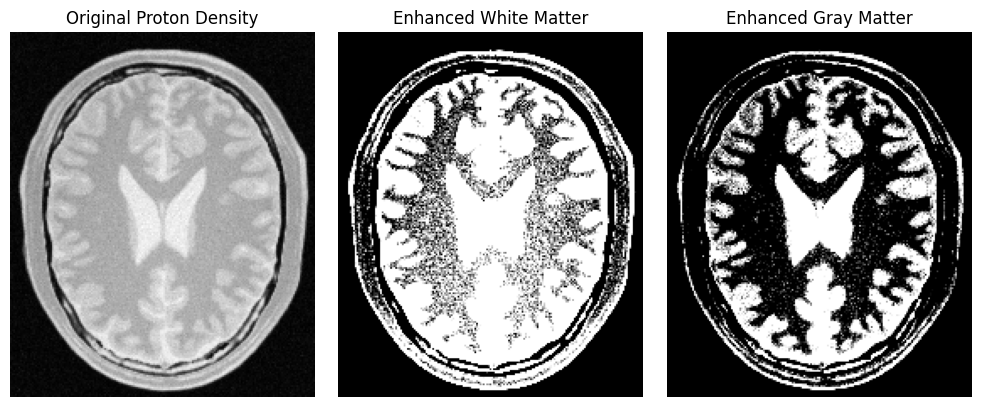

In [6]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
plt.imshow(brain_array, cmap="gray")
plt.title("Original Proton Density")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(white_matter_contrast, cmap="gray")
plt.title("Enhanced White Matter")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(gray_matter_contrast, cmap="gray")
plt.title("Enhanced Gray Matter")
plt.axis("off")

plt.tight_layout()
plt.show()